In [48]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import tensorflow.keras.layers as tfl
#import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory as idd
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
import imageio.v2 as imageio
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow import keras
import random
import sys
print(sys.version)

3.11.4 | packaged by conda-forge | (main, Jun 10 2023, 17:59:51) [MSC v.1935 64 bit (AMD64)]


In [ ]:
'''Resnets_10_locations.  Started on 12/27/22 for the "well_expanded" 15k EM images, which only have 10 classes.
these classes could be further reduced to 9 by consolidating 7 and 8, the rotated edges.'''

In [49]:
# This cell is for regular use as it produces two columns
# It is usable for double classification (granules and location)
# Use next cell for single location classification
# labels are contained in a text file of digits in 2 columns 
# converted from numpy arrays to lists
#Y = np.loadtxt("C:/Users/erios/images_3_color_15k_labeled/labels_for_locations_index0.txt", dtype='int')
Y = np.loadtxt("C:/Users/erios/images_3_color_15k_labeled_exp_well/labels_for_locations.txt", dtype='int')
y1 = Y[:, 0]; y2 = Y[:, 1]
y1list = list(y1)
y2list = list(y2)
y1[:10], y2[:10]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([7, 7, 7, 8, 0, 9, 4, 5, 4, 0]))

In [ ]:
# for a special case
Y = np.loadtxt("C:/Users/erios/images_3_color_no_label/pred_granules_column.txt", dtype='int')
y1 = Y[:, 0]; y2 = Y[:, 1]
y1list = list(y1)
y2list = list(y2)


In [9]:
# Use this cell for single location classification

Y = np.loadtxt("C:/Users/erios/images_3_color_15k_labeled_exp_well/labels_for_locations.txt", dtype='int')
#type(Y)
y2list = list(Y)

In [ ]:
# checking the labels list
i=110

i=i+1; print(i)
y2list[i*16:i*16+16]

In [ ]:
# these are np arrays; not used when in Dataset mode
y1train=y1[:384];y1validation=y1[384:]  # granule count
y2train=y2[:384];y2validation=y2[384:]  # location
Ylist_train1=list(y1train)
Ylist_train2=list(y2train)
Ylist_validation1=list(y1validation)
Ylist_validation2=list(y2validation)
Ylist_train2[:5] 

In [113]:
# Inputs images and their labels
# Dataset are tuples 
BATCH_SIZE = 32
IMG_SIZE = (224, 224)
# directory = "C:/Users/erios/images_3_color_no_label/"  #special case for generating an illustration
directory = "C:/Users/erios/images_3_color_15k_labeled_exp_well/"

# just "files_by_location/" also works.  Forward slash / required. Back slash does not work.
train_dataset = idd(directory,
                                             labels=y2list,
                                             label_mode='int',
                                             shuffle=True,
                                             color_mode='rgb',
                                             batch_size=32,
                                             image_size=IMG_SIZE,
                                             validation_split=0.2,  #for inverse, use 0.75
                                             subset='training',
                                             seed=42)
validation_dataset = idd(directory,
                                             labels=y2list,
                                             label_mode='int',
                                             shuffle=True,
                                             color_mode='rgb',
                                             batch_size=32,
                                             image_size=IMG_SIZE,
                                             validation_split=0.2,   #special
                                             subset='validation',
                                             seed=42)

Found 5120 files belonging to 10 classes.
Using 4096 files for training.
Found 5120 files belonging to 10 classes.
Using 1024 files for validation.


In [7]:
filename= 'C:/Users/erios/images_3_color_15k_labeled_exp_well/here/image00023.jpg'
img = imageio.imread(filename)

In [52]:
for image, _ in train_dataset.take(1):
    print(image.shape)

(32, 224, 224, 3)


In [67]:
# Use this cell for images subjet to predictions.  strangely, I named the dataset fit_dataset.
BATCH_SIZE = 32
IMG_SIZE = (224,224)
# directory = "C:/Users/erios/images_3_color_no_label/"  # regular use
# directory = "C:/Users/erios/images_3_color_15k_labeled/"  # for a special error calculation (will "predict" the training set)
directory = "C:/Users/erios/images_3_color_15k_no_label_exp_well/"
# for some reason, the details of the above line are important
# images without label, for classification
fit_dataset = idd(directory, 
                    labels=None,
                    image_size=IMG_SIZE,
                    batch_size=32,
                    shuffle=False,
                    color_mode='rgb',
                    seed=42)


Found 15360 files belonging to 1 classes.


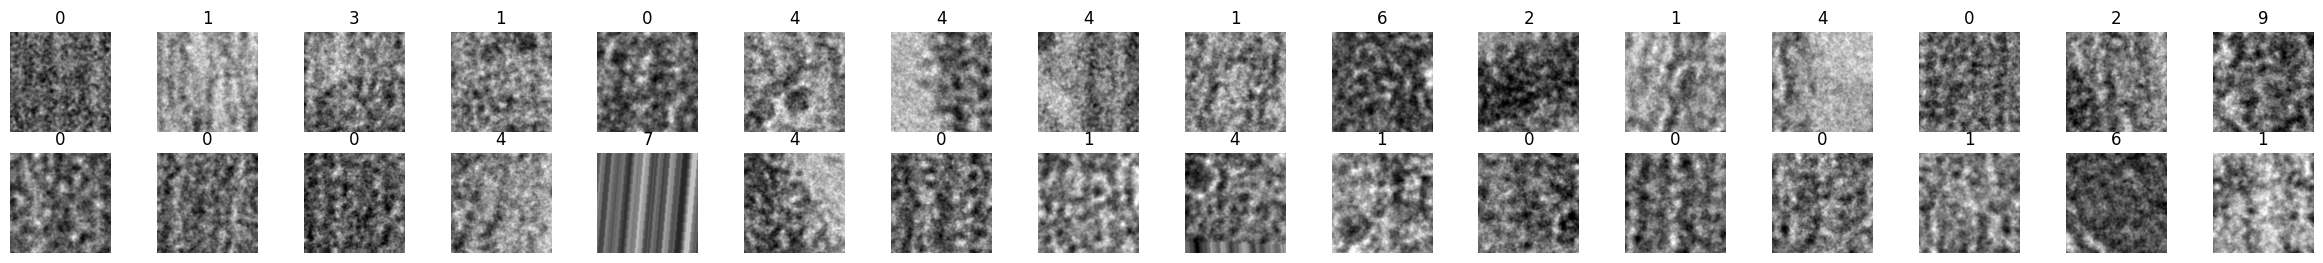

In [58]:
plt.figure(figsize=(30,6))
for images, labels in train_dataset.take(3):
    for i in range(0,32):
        ax=plt.subplot(4,16,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

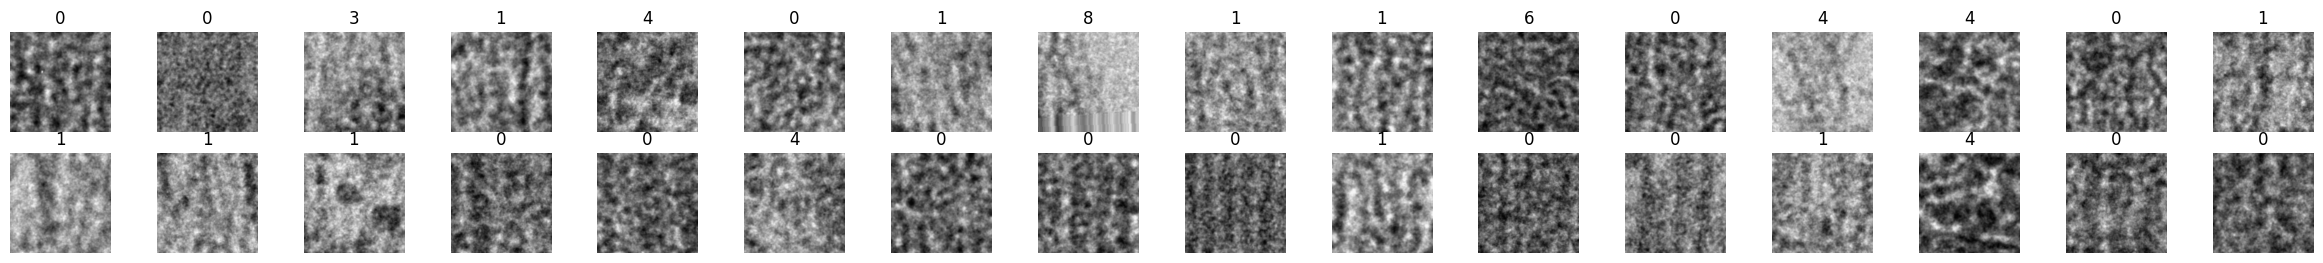

In [79]:
plt.figure(figsize=(30,6))
for images, labels in train_dataset_b.take(3):
    for i in range(0,32):
        ax=plt.subplot(4,16,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [69]:
for element, label in train_dataset_a.take (1):
    print(element.shape, label.shape)

(32, 224, 224, 3) (32,)


In [ ]:
# to display images for prediction. 
for n in range(9,17):
    plt.figure(figsize=(30,8))
    for images in fit_dataset.take(n):   #general use
        for i in range(0,32):
            ax=plt.subplot(4,16,i+1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(int(preds[(n-1)*32+i]))   #general use
            plt.axis("off")

In [ ]:
plt.figure(figsize=(30,12))
for images in fit_dataset.take(1):
    for i in range(0,32):
        ax=plt.subplot(4,8,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
#        plt.title(int(preds[i]))
        plt.axis("off")

In [94]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
preprocess_input = tf.keras.applications.resnet50.preprocess_input

In [124]:
#def locations_model(image_shape=IMG_SIZE, data_augmentation=data_augmenter()):  # it works with data_augmentation
#as argument, provided that the data_augmenter function is valid (above). data_aug is not used below.
def locations_model(image_shape=IMG_SIZE, data_augmentation=None):
#def locations_model(image_shape=IMG_SIZE)
    input_shape = image_shape + (3,)
    base_model = tf.keras.applications.ResNet50(input_shape=input_shape,
                                                   include_top=False, # <== Important!!!!
                                                   weights='imagenet') # From imageNet
    base_model.trainable = False
    print("Number of layers in the base model: ", len(base_model.layers))
    inputs = tf.keras.Input(shape=input_shape) 
    x = preprocess_input(inputs) 
    x = base_model(x, training=False) 
    x = tfl.GlobalAveragePooling2D()(x) 
    x = tfl.Dropout(.2)(x)
    outputs = tfl.Dense(10, activation = "softmax")(x)
    model = tf.keras.Model(inputs, outputs)
    
    return model 
#model2 = locations_model(IMG_SIZE, data_augmentation)
model2 = locations_model(IMG_SIZE)
base_learning_rate = 0.003
model2.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=base_learning_rate),  # .legacy for optimizer added on 09/23
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

Number of layers in the base model:  175


In [125]:
# Save the initial weights (for resetting to initial state)
model2.save_weights('./checkpoints/model2_init_weights')


In [96]:
seed = (1,2)
ran = tf.keras.layers.RandomContrast(0.4)
def augment (image, label):
    global seed
    seed = (seed[0] + random.randint(0, 10000), seed[1] + random.randint(0, 10000))
    input_image = tf.image.resize(image, (224,224), method = 'nearest')
    input_image = tf.image.stateless_random_flip_left_right(input_image, seed)
    input_image = tf.image.stateless_random_flip_up_down(input_image, seed)
    input_image = ran(input_image)
    input_image = tf.image.random_brightness(input_image, 0.25)  # RandomBrightness 0.25.  Same as granules. Must check.
    return input_image, label

In [97]:
ran = tf.keras.layers.RandomContrast(0.4)
def augment_val (image, label):
    input_image = tf.image.resize(image, (224,224), method = 'nearest')
    return input_image, label

In [128]:
#coarse_tuning_counter=0
acc = [0.]
loss = [0.]
val_acc = [0.]
val_loss = [0.]

In [133]:
print(type(loss), type(history.history['accuracy']))

<class 'list'> <class 'list'>


In [75]:
for element, label in train_dataset_a.take(1):
    print(element.shape,label.shape)

(32, 224, 224, 3) (32,)


In [120]:
train_dataset_a = train_dataset.map(augment)
train_dataset_b = train_dataset_a.cache().shuffle(BUFFER_SIZE)
validation_dataset_a = validation_dataset.map(augment)

In [137]:
checkpoint_filepath = 'C:/Users/erios/checkpoints/checkpoint_Resnets_10_loc'  #2b is for use with 6 labels
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,  save_weights_only=True, monitor="accuracy",
    mode='max', save_best_only=True)
train_dataset_a = train_dataset.map(augment)
validation_dataset_a = validation_dataset.map(augment)
BUFFER_SIZE = 5120
train_dataset_b = train_dataset_a.cache().shuffle(BUFFER_SIZE)
if coarse_tuning_counter == 0:
    initial_epochs = 4          # use in general 5
    total_epochs = initial_epochs
    history = model2.fit(train_dataset_b, validation_data=validation_dataset_a, epochs=initial_epochs)
#    history = model2.fit(validation_dataset, validation_data=train_dataset, epochs=initial_epochs)
else:
    more_epochs = 10
    total_epochs =  total_epochs + more_epochs
    history = model2.fit(train_dataset_b,
#    history = model2.fit(validation_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset_a)
#                         validation_data=train_dataset)
coarse_tuning_counter += 1    
acc += history.history['accuracy']
val_acc += history.history['val_accuracy']

loss += history.history['loss']
val_loss += history.history['val_loss']


Epoch 7/17
128/128 [==============================] - 190s 1s/step - loss: 1.8089 - accuracy: 0.3376 - val_loss: 1.9987 - val_accuracy: 0.3105
Epoch 8/17
128/128 [==============================] - 176s 1s/step - loss: 1.7717 - accuracy: 0.3455 - val_loss: 2.0462 - val_accuracy: 0.2861
Epoch 9/17
128/128 [==============================] - 174s 1s/step - loss: 1.7312 - accuracy: 0.3560 - val_loss: 2.0144 - val_accuracy: 0.2852
Epoch 10/17
128/128 [==============================] - 182s 1s/step - loss: 1.7087 - accuracy: 0.3594 - val_loss: 1.9704 - val_accuracy: 0.3018
Epoch 11/17
128/128 [==============================] - 173s 1s/step - loss: 1.6807 - accuracy: 0.3733 - val_loss: 1.9691 - val_accuracy: 0.2949
Epoch 12/17
128/128 [==============================] - 173s 1s/step - loss: 1.6732 - accuracy: 0.3787 - val_loss: 2.1047 - val_accuracy: 0.2822
Epoch 13/17
128/128 [==============================] - 174s 1s/step - loss: 1.6080 - accuracy: 0.4004 - val_loss: 2.1224 - val_accuracy: 0.

In [134]:
acc += history.history['accuracy']
val_acc += history.history['val_accuracy']

loss += history.history['loss']
val_loss += history.history['val_loss']

In [68]:
probs = model2.predict(fit_dataset)
preds = probs.argmax(axis=-1)

480/480 [==============================] - 523s 1s/step


In [69]:
# output to C:\Users\erios\notebooks\
with open("locations_11on_model__test.txt", 'wb') as f:
    np.savetxt(f, preds, '%3i', newline = ' ')
f.close()

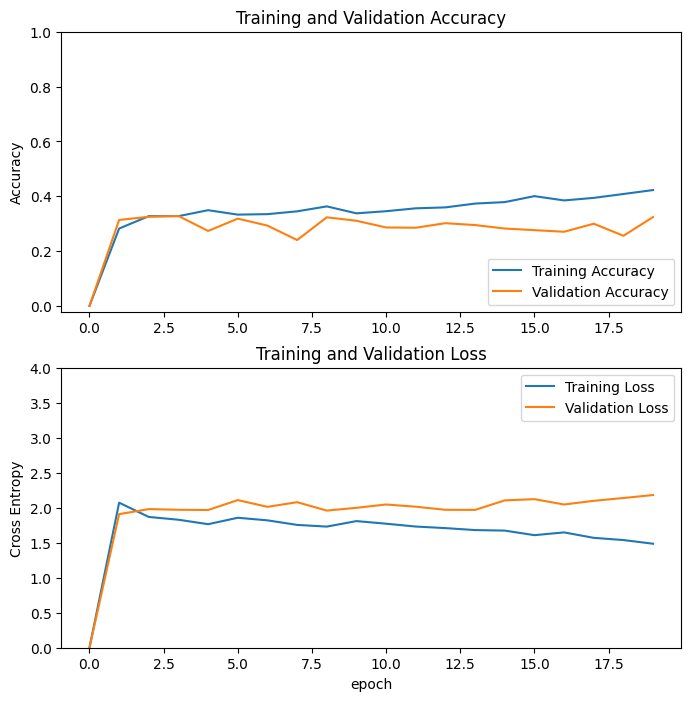

In [138]:
#acc = [0.] + history.history['accuracy']
#val_acc = [0.] + history.history['val_accuracy']

#loss = history.history['loss']
#val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,4.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [139]:
# Save the weights skip in general use
model2.save_weights('./checkpoints/model2b_1')
# model2_3 is after 7 c 6 f to 158.  test acc 0.855 val acc 0.804
# model2_2 is after 7 c 4 f to 165.  test acc 0.815 val acc 0.767
# model2.save_weights('./checkpoints/model2_1')
# model2_1 is after 7 coarse tuning of large index0 training set val 0.25, acc 0.7463 (previous was 0.7478))
# model2_5 is after 8 c and 2 fine to 169. test acc 0.818, val acc 0.834
# model2_4 is after 8 c to 172. test acc 0.776 val acc 0.806
# model2_6 is after 8 c and 8 fine to 164. test acc 0.856 val acc 0.814
# model2_7 is after 8 c 8 fine to 164 and 3 reverse (trains on the "validation" set)
# test acc 0.843, val acc 0.853. Note, before change to 10 outputs.
# in other words, must have 11 output model to use these weights
# model2_7 may have been written over 
# model2_8 is with the 10 output model after 5 c 8 f from 156 with "straight" datasets. 0.817, 0.792
# model2_9 "" with "inverted"datasets. 0.966 and 0.827 (from 159--had to go back after trying 144)
# model2b_1 is using data augmentation of both train and val sets


In [ ]:
model2.load_weights('./checkpoints/model2_8')

In [ ]:
base_model = model2.layers[3]
print("Number of layers in the base model: ", len(base_model.layers))

In [140]:
# UNQ_C3
base_model = model2.layers[3]
base_model.trainable = True
# Fine-tune from this layer onwards
fine_tune_at = 168
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False
model2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
               optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.3*base_learning_rate), 
               metrics=['accuracy'])

In [141]:
fine_tuning_counter = 0

In [142]:
more_epochs = 40
total_epochs =  total_epochs + more_epochs
if fine_tuning_counter == 0:
    history_fine = model2.fit(train_dataset_b,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset_a)
else:
    history_fine = model2.fit(train_dataset_b,
                         epochs=total_epochs,
                         initial_epoch=history_fine.epoch[-1]+1,
                         validation_data=validation_dataset_a)
fine_tuning_counter += 1
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

Epoch 17/57
128/128 [==============================] - 199s 2s/step - loss: 1.6997 - accuracy: 0.3735 - val_loss: 1.8603 - val_accuracy: 0.3203
Epoch 18/57
128/128 [==============================] - 194s 2s/step - loss: 1.5717 - accuracy: 0.3958 - val_loss: 1.9267 - val_accuracy: 0.3125
Epoch 19/57
128/128 [==============================] - 191s 1s/step - loss: 1.5264 - accuracy: 0.4048 - val_loss: 1.9038 - val_accuracy: 0.3145
Epoch 20/57
128/128 [==============================] - 187s 1s/step - loss: 1.4848 - accuracy: 0.4219 - val_loss: 1.8863 - val_accuracy: 0.3223
Epoch 21/57
128/128 [==============================] - 186s 1s/step - loss: 1.4280 - accuracy: 0.4517 - val_loss: 2.0035 - val_accuracy: 0.3057
Epoch 22/57
128/128 [==============================] - 185s 1s/step - loss: 1.3916 - accuracy: 0.4661 - val_loss: 1.9756 - val_accuracy: 0.3115
Epoch 23/57
128/128 [==============================] - 180s 1s/step - loss: 1.2950 - accuracy: 0.5146 - val_loss: 2.2043 - val_accuracy:

In [118]:
fine_tuning_counter += 1
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

In [ ]:

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
#plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         
         
         
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
val_acc?


In [ ]:
# Save the weights skip in general use
# model2.save_weights('./checkpoints/model2_after_tuning_layer160')
# initial weights (for resetting to initial state)
# model2.load_weights('./checkpoints/model2_after_coarse_tuning')
model2.load_weights('./checkpoints/model2_after_tuning_layer160')

In [ ]:
probs = model2.predict(fit_dataset)
preds = probs.argmax(axis=-1)

In [ ]:
preds[4]


In [ ]:
type(fit_dataset)

In [ ]:
# in general do not use this
textstring = ("C:/Users/erios/images_3_color_no_label/pred_locations.txt")
with open(textstring, 'wb') as f:
    np.savetxt(f, preds, '%3i', newline = ' ')
f.close()


In [ ]:
print(len(preds))

In [ ]:
# this is the practical output
textstring = ("C:/Users/erios/images_3_color_no_label/pred_locations_training_set.txt")
f = open(textstring, "w")
for i in range(len(preds)):
    f.write("\n"+str(i)+"   "+str(preds[i]))
f.close()   